## TensorFlow Implementation

First install PIL or Pillow:

```
$ sudo -H pip3 install pillow
```

Original image :


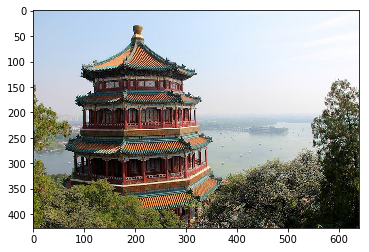

Vertical Line feature map :


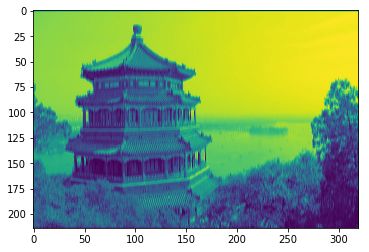

Horizontal Line feature map :


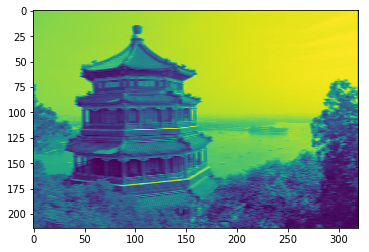

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_images

def show_image(image, title):
    print(title, ':')
    plt.imshow(image)
    plt.show()

# Load sample images.
images = load_sample_images().images
dataset = np.array(images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create two filters.
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the two filters.
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding='SAME')

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

# Plot first image and its feature maps.
show_image(images[0],          'Original image')
show_image(output[0, :, :, 0], 'Vertical Line feature map')
show_image(output[0, :, :, 1], 'Horizontal Line feature map')